## Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from pyfim import pyeclat
from mlxtend.frequent_patterns import association_rules, fpmax, fpgrowth, apriori
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

Formatação das tabelas:

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

## Pré-Processamento Dos Dados

### Conjunto de dados Fps

Carregamento dos dados do ficheiro fps.txt

In [3]:
fps_ds = pd.read_csv("fps.txt",sep=",", header=None)

fps_ds

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163   164   165   166   167   168   169   170   171   172   173   174   175   176   177   178   179   180   181   182   183   184   185   186   187   188   189   190   191   192   193   194   195   196   197   198   199   200   201   202   203   204   205   206   207   208   209   210   211   212   213   214   215   216   217   218   219   220   221   222   223   224   225   226   227   228   229   230   231   232   233   234   235   236   237   238   239   240   241   242   243   244   245   246   247   248   249   250   251   252   253   254   255   256   257   258   259   260   261   262   263   264   265   266   267   268   269   270   271   272   273   274   275   276   277   278   279   280   281   282   283   284   285   286   287   288   289   290   291   292   293   294   295   296   297   298   299   300   301   302   303   304   305   306   307   308   309   310   311   312   313   314   315   316   317   318   319   320   321   322   323   324   325   326   327   328   329   330   331   332   333   334   335   336   337   338   339   340   341   342   343   344   345   346   347   348   349   350   351   352   353   354   355   356   357   358   359   360   361   362   363   364   365   366   367   368   369   370   371   372   373   374   375   376   377   378   379   380   381   382   383   384   385   386   387   388   389   390   391   392   393   394   395   396   397   398   399   400   401   402   403   404   405   406   407   408   409   410   411   412   413   414   415   416   417   418   419   420   421   422   423   424   425   426   427   428   429   430   431   432   433   434   435   436   437   438   439   440   441   442   443   444   445   446   447   448   449   450   451   452   453   454   455   456   457   458   459   460   461   462   463   464   465   466   467   468   469   470   471   472   473   474   475   476   477   478   479   480   481   482   483   484   485   486   487   488   489   490   491   492   493   494   495   496   497   498   499   500   501   502   503   504   505   506   507   508   509   510   511   512   513   514   515   516   517   518   519   520   521   522   523   524   525   526   527   528   529   530   531   532   533   534   535   536   537   538   539   540   541   542   543   544   545   546   547   548   549   550   551   552   553   554   555   556   557   558   559   560   561   562   563   564   565   566   567   568   569   570   571   572   573   574   575   576   577   578   579   580   581   582   583   584   585   586   587   588   589   590   591   592   593   594   595   596   597   598   599   600   601   602   603   604   605   606   607   608   609   610   611   612   613   614   615   616   617   618   619   620   621   622   623   624   625   626   627   628   629   630   631   632   633   634   635   636   637   638   639   640   641   642   643   644   645   646   647   648   649   650   651   652   653   654   655   656   657   658   659   660   661   662   663   664   665   666 

Descrição estatística do conjunto de dados:

In [4]:
fps_ds.describe()

1            2            3            4            5            6            7            8            9            10           11           12           13           14           15           16           17           18           19           20           21           22           23           24           25           26           27           28           29           30           31           32           33           34           35           36           37           38           39           40           41           42           43           44           45           46           47           48           49           50           51           52           53           54           55           56           57           58           59           60           61           62           63           64           65           66           67           68           69           70           71           72           73           74           75           76           77           78           79           80           81           82           83           84           85           86           87           88           89           90           91           92           93           94           95           96           97           98           99           100          101          102          103          104          105          106          107          108          109          110          111          112          113          114          115          116          117          118          119          120          121          122          123          124          125          126          127          128          129          130          131          132          133          134          135          136          137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154          155          156          157          158          159          160          161          162          163          164          165          166          167          168          169          170          171          172          173          174          175          176          177          178          179          180          181          182          183          184          185          186          187          188          189          190          191          192          193          194          195          196          197          198          199          200          201          202          203          204          205          206          207          208          209          210          211          212          213          214          215          216          217          218          219          220          221          222          223          224          225          226          227          228          229          230          231          232          233          234          235          236          237          238          239          240          241          242          243          244          245          246          247          248          249          250          251          252          253          254          255          256          257          258          259          260          261          262          263          264          265          266          267          268          269          270          271          272          273          274          275          276          277          278          279          280          281          282          283          284          285          286          287          288          289          290          291          292          293          294          295          296          297          298          299          300          301          302          303          304          305          306          307          308      

Verificação e seleção dos atributos mais ativos e menos ativos nas moléculas:

In [5]:
#Seleção dos 5 atributos mais ativos
description=fps_ds.describe()
mean=description.iloc[2].sort_values(ascending=[False])
mean_index=mean.index.to_list()[:5]
mean_values=mean.tolist()[:5]

#Seleção dos 5 atributos menos ativos
mean=description.iloc[2].sort_values(ascending=[True])
mean_index_least_active=mean.index.to_list()[:5]
mean_values_least_active=mean.tolist()[:5]

print("Os 5 atributos mais ativos são:")
for i in range(5):
    print("Atributo {} está ativo em cerca de {}% das moléculas".format(mean_index[i], mean_values[i]*100))

print("\nOs 5 atributos menos ativos são:")
for i in range(5):
    print("Atributo {} está ativo em cerca de {}% das moléculas".format(mean_index_least_active[i], mean_values_least_active[i]*100))


Os 5 atributos mais ativos são:
Atributo 927 está ativo em cerca de 50.02270147676558% das moléculas
Atributo 1918 está ativo em cerca de 50.01180605394564% das moléculas
Atributo 1089 está ativo em cerca de 49.53736926481335% das moléculas
Atributo 1020 está ativo em cerca de 49.31150112641842% das moléculas
Atributo 936 está ativo em cerca de 48.574595947681054% das moléculas

Os 5 atributos menos ativos são:
Atributo 45 está ativo em cerca de 3.013743873394561% das moléculas
Atributo 1876 está ativo em cerca de 4.260139710839871% das moléculas
Atributo 1321 está ativo em cerca de 5.215209934830497% das moléculas
Atributo 201 está ativo em cerca de 5.215209934830497% das moléculas
Atributo 1008 está ativo em cerca de 5.215209934830497% das moléculas


Verificação de valores nulos no conjunto de dados:

In [6]:
n = pd.isnull(fps_ds).sum()

In [7]:
j = 0
null_values = False

for i in n:
    if(i > 0):
        print(j)
        null_values = True
    j += 1

if(null_values == False):
    print("No Null Values in fps Dataset")

No Null Values in fps Dataset


### Conjunto de dados Acts

Carregamento dos dados do ficheiro acts.txt:

In [8]:
acts = open("acts.txt", "rt", encoding="utf-8").readlines()
acts_ds = pd.DataFrame([sub.split("\t") for sub in acts]).replace('\n','', regex=True).replace(':','', regex=True).set_index(0)
acts_ds

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PDFDA0001,POL,ABCB1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
PDFDA0002,ADRB1,SLC22A1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
PDFDA0003,REP,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
PDFDA0004,PRNP,LEF,LMNA,TSHR,CYP2D6,CYP1A2,None,None

Transformação do dataframe numa lista, removendo o índice (moléculas) e os valores nulos:

In [9]:
acts_ds = [[y for y in x if pd.notna(y)] for x in acts_ds.values.tolist()]

Transformação da lista num dataframe com apenas valores booleanos:

In [10]:
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(acts_ds).transform(acts_ds)
acts_binary_ds = pd.DataFrame(trans_array, columns=tr_enc.columns_)
acts_binary_ds

1272966  5HTR1D  AADAC   AAK1   ABAT  ABCB1  ABCB11  ABCB1A  ABCB1B  ABCC1  ABCC2  ABCC3  ABCC4  ABCC5  ABCC8  ABCG2  ABHD12  ABHD16A  ABHD6   ABL1   ABL2    ACE   ACHE  ACMSD    ACR  ACVR1  ACVR1B  ACVR2A  ACVR2B  ACVRL1    ADA  ADAM17  ADORA1  ADORA2A  ADORA2B  ADORA3  ADRA1A  ADRA1B  ADRA1D  ADRA2A  ADRA2B  ADRA2C  ADRB1  ADRB2  ADRB3    AGL  AGTR1  AGTR1B  AGTR2     AK  AKR1B1  AKR1B10  AKR1C1  AKR1C2  AKR1C3   AKT1   AKT2    ALB    ALD  ALDH1A1  ALDH2  ALDOA    ALK  ALOX12  ALOX15  ALOX15B  ALOX5  ALOX5AP   ALP1   ALPL    ALR   AMPC  AMY1A   AMY2  AMY2A  ANKK1   AOC3   AOX1  APAF1   APCS  APEX1    APP     AR   ARAF   ARG1  ARPP19  ASIC1  ASIC3   ASPH  ATG4B  ATP12A  ATP1A1   ATPE  AURKA  AURKB  AURKC  AVPR1A  AVPR1B  AVPR2    AXL  BACE1   BCHE   BCL1    BCR  BDKRB2  BETA-TUBULIN   BGLA    BLA  BLA(BEL1)  BLA(TEM-2)  BLAACC-4  BLACTX-M-53  BLAGES-13  BLAGIL-1  BLAIMP-1  BLAPER-2  BLASCO-1  BLASHV-55  BLASHV-72  BLAT-6  BLATEM-1  BLATEM-125  BLAUOE-1  BLAVIM   BLAY   BLAZ    BLK    BLM  BMP2K  BMPR1A  BMPR1B  BMPR2    BMX   BRAF  BRCA1   BRD2   BRD3   BRD4  BRSK1  BRSK2    BTK  BTN3A1   BTS1     C5     CA    CA1   CA12   CA13   CA14   CA15    CA2    CA3    CA4   CA5A   CA5B    CA6    CA7    CA9  CACNA1B  CACNA1C  CACNA1D  CACNA1G  CACNA1H  CACNA1I  CACNA1S  CACNA2D1  CACNA2D2   CALM  CALM1  CAMK1  CAMK1D  CAMK1G  CAMK2A  CAMK2B  CAMK2D  CAMK2G  CAMK4  CAMKK1  CAMKK2   CAN2  CAPN2   CASK  CASP1  CASP2  CASP3  CASP7   CASR  CCKBR   CCR2   CCR4   CCR5   CCR8  CDC25A  CDC25B  CDC42BPA  CDC42BPB  CDC42BPG   CDK1  CDK11A  CDK11B  CDK14  CDK15  CDK16  CDK17  CDK18  CDK19   CDK2   CDK4   CDK5   CDK6   CDK7  CDPK1    CEL  CELA1   CES2   CETP   CFTR   CHAT  CHEK1  CHEK2  CHRM1  CHRM2  CHRM3  CHRM4  CHRM5  CHRNA1  CHRNA7  CHRNE  CISD1    CIT   CLK1   CLK2   CLK3   CLK4   CLPP   CMA1   CNR1   CNR2   COMT  COQ8A  COQ8B  CRABP1   CRBN  CREBBP  CSF1R    CSK   CSN2  CSNK1A1  CSNK1A1L  CSNK1D  CSNK1E  CSNK1G1  CSNK1G2  CSNK1G3  CSNK2A1  CSNK2A2  CTDSP1    CTH  CTRB1   CTRC   CTSA   CTSB   CTSC   CTSF   CTSG   CTSH   CTSK   CTSL   CTSS   CTSV   CTSZ  CX3CR1  CXCL8  CXCR1  CXCR2  CXCR4   CYCS   CYNT  CYP11A1  CYP11B1  CYP11B2  CYP121  CYP17A1  CYP19A1  CYP1A1  CYP1A2  CYP1B1  CYP21A2  CYP24A1  CYP26B1  CYP2A13  CYP2A2  CYP2A5  CYP2A6  CYP2B6  CYP2C19  CYP2C8  CYP2C9  CYP2D26  CYP2D4  CYP2D6  CYP2E1  CYP2J2  CYP3A4  CYP3A5  CYP51  CYP51A  CYP51A1  CYP51B  CYP7A1  CYSLTR1  CYSLTR2  DAGLA  DAGLB   DAPA   DAPE  DAPK1  DAPK2  DAPK3  DCLK1  DCLK2  DCLK3    DDL   DDR1   DDR2   DDX1   DFR1   DFRA   DHFR  DHFRI  DHODH  DHRS9   DIO3   DMPK   DNAB  DNASE1  DNMT1  DNMT3B   DOHH  DOT1L  DPEP1   DPP4   DPP8   DPP9   DRD1   DRD2   DRD3   DRD4   DRD5  DSTYK  DUSP3  DYRK1A  DYRK1B  DYRK2     E2    EBP   EBPL   ECE1  EDNRA  EDNRB   EGFR  EGLN1  EIF2AK1  EIF2AK2  EIF2AK4  ELANE  ENGASE  ENPP2    ENV  EPHA1  EPHA2  EPHA3  EPHA4  EPHA5  EPHA6  EPHA7  EPHA8  EPHB1  EPHB2  EPHB3  EPHB4  EPHB6  EPHX1  EPHX2  ERBB2  ERBB3  ERBB4   ERG2   ERN1   ERN2   ESR1   ESR2  ESRRA  ESRRB    F10     F2     F3     F7   FAAH  FABP1  FABP2    FAP   FASN   FBP1  FCER1A  FDFT1   FDPS   FECH    FER    FES  FFAR1  FFAR4    FFP  FGFR1  FGFR2  FGFR3  FGFR4    FGR  FIBCD1  FKBP1A  FKBP1B  FKBP5   FLT1   FLT3   FLT4   FOLA   FOLK   FOLP  FOLR1  FOLR2   FPGS   FPPS   FPR1    FRK   FSHR    FTL    FTO    FYN    GAA  GABRA1  GABRA2  GABRA3  GABRA4  GABRA5  GABRB3  GABRG1  GABRR1   GAD1  GAG-PRO    GAK   GALE  GALNS    GBA   GBA2     GC   GFER  GGPS1    GLA   GLB1   GLMU  GLRA1   GLUL   GMNN  GNRHR     GP  GPBAR1  GPER1   GPM2   GPM3  GPR119  GPR17  GPR18  GPR35  GPR55   GRB2  GRIA1  GRIA2  GRIA3  GRIA4  GRIK1  GRIK2  GRIK3  GRIK5  GRIN1  GRIN2B  GRIN2C   GRK1   GRK2   GRK4   GRK7   GRM1   GRM2   GRM3   GRM4   GRM5   GRM6   GRM7   GRM8   GSC1  GSK3B    GSR  GSTA1  GSTK1  GSTO1  GSTP1   GUSB   GYRA   GYRB   H1-0   HAO1    HBB  HBCAG  HCAR2    HCK   HCN2   HCN4  HCRTR2   HD1B  HDA106  HDAC1  HDAC10  HDAC11  HDAC2  HDAC3  HDAC4  HDAC5  HDAC6  HDAC7  HDAC8  HDAC9   HDAH  HIF1A  HIPK1  HIPK2  HIPK3 

Números de genes presentes em cada molécula:

In [11]:
nTargets = acts_binary_ds.sum(axis=1)
nTargets

0        2
1        2
2        1
3        6
4       23
        ..
1096     9
1097     8
1098    21
1099     2
1100     4
Length: 1101, dtype: int64

Seleção das 5 moléculas que têm os maiores números de genes:

In [12]:
top5 = nTargets.sort_values(ascending=[False]).head()

In [13]:
gene = top5.to_list()

In [14]:
molecules = fps_ds.set_index(0)
molecules_list = molecules.index.to_list()

In [15]:
molecule_index = top5.index.to_list()

In [16]:
j = 1
for i in molecule_index:
    print("{}- {} tem {} genes".format(j, molecules_list[i], gene[j-1]))
    j += 1

1- PDFDA0131 tem 201 genes
2- PDFDA0965 tem 179 genes
3- PDFDA0907 tem 131 genes
4- PDFDA0263 tem 129 genes
5- PDFDA0772 tem 110 genes


Seleção de 10 moléculas que têm o menor número de genes:

In [17]:
top1101 = nTargets.sort_values()

In [18]:
molecule_index = top1101.index.to_list()

In [19]:
molecules = fps_ds.set_index(0)
molecules_list = molecules.index.to_list()

In [20]:
for index, n in enumerate(top1101):
    if(n == 1 and index<10):
        print("{}- {} tem 1 gene".format(index+1, molecules_list[molecule_index[index]]))
    elif(n > 1):
        break

print("\nForam selecionadas 10 das {} moléculas que têm apenas 1 gene".format(index))

1- PDFDA0551 tem 1 gene
2- PDFDA0670 tem 1 gene
3- PDFDA0155 tem 1 gene
4- PDFDA0666 tem 1 gene
5- PDFDA0648 tem 1 gene
6- PDFDA0644 tem 1 gene
7- PDFDA0639 tem 1 gene
8- PDFDA0162 tem 1 gene
9- PDFDA0638 tem 1 gene
10- PDFDA0637 tem 1 gene

Foram selecionadas 10 das 182 moléculas que têm apenas 1 gene


Verificação e seleção dos genes mais ativos e menos ativos nas moléculas, para isso, os valores do acts_binary_ds foram convertidos para valores binários: 
- False -> 0; 
- True -> 1.

In [21]:
temp_acts_ds = acts_binary_ds.astype(int)

In [22]:
#Seleção dos 5 atributos mais ativos
description=temp_acts_ds.describe()
mean=description.iloc[2].sort_values(ascending=[False])
mean_index=mean.index.to_list()[:5]
mean_values=mean.tolist()[:5]

#Seleção dos 5 atributos menos ativos
mean=description.iloc[2].sort_values(ascending=[True])
mean_index_least_active=mean.index.to_list()[:5]
mean_values_least_active=mean.tolist()[:5]

print("Os 5 genes mais ativos são:")
for i in range(5):
    print("O gene {} está ativo em cerca de {}% moléculas".format(mean_index[i], mean_values[i]*100))

print("\nOs 5 genes menos ativos são:")
for i in range(5):
    print("O gene {} está ativo em cerca de {}% moléculas".format(mean_index_least_active[i], mean_values_least_active[i]*100))


Os 5 genes mais ativos são:
O gene REP está ativo em cerca de 49.98802597932382% moléculas
O gene SLCO1B1 está ativo em cerca de 46.10750559828712% moléculas
O gene SLCO1B3 está ativo em cerca de 46.069166425279924% moléculas
O gene LMNA está ativo em cerca de 41.55232432537185% moléculas
O gene CYP3A4 está ativo em cerca de 33.93033219437405% moléculas

Os 5 genes menos ativos são:
O gene ZAP70 está ativo em cerca de 3.013743873394561% moléculas
O gene MME está ativo em cerca de 3.013743873394561% moléculas
O gene S1PR1 está ativo em cerca de 3.013743873394561% moléculas
O gene S1PR3 está ativo em cerca de 3.013743873394561% moléculas
O gene S1PR4 está ativo em cerca de 3.013743873394561% moléculas


### Association Rules

O primeiro objetivo definido, passa pela descoberta de associações entre os genes, de forma a saber por exemplo, que genes uma molécula poderá ter se tiver o gene a, b ou c. 

Para a indetificação destas associações é verificado em primeiro lugar o desempenho para diferentes valores de threshold e algoritmos (algoritmos testados - Apriori, FP-growth e ECLAT):

In [23]:
D={"threshold": [0.2, 0.1, 0.05, 0.02, 0.015], 
   "num_itemsets":[],
   "Apriori Time":[], 
   "FP-growth Time":[], 
   "ECLAT Time":[]}

for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(acts_binary_ds, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_apriori.shape[0])
    D["Apriori Time"].append(t1-t0)

    FI_fpg= fpgrowth(acts_binary_ds, min_supp)
    t2 = time.time()
    D["FP-growth Time"].append(t2-t1)

    FI_eclat= pyeclat(acts_ds, min_supp)    
    t3 = time.time()
    D["ECLAT Time"].append(t3-t2)
    

df_performance=pd.DataFrame(D)
df_performance

,threshold,num_itemsets,Apriori Time,FP-growth Time,ECLAT Time
0,0.200,5,0.008345,0.012615,0.012888
1,0.100,14,0.009665,0.014645,0.010367
2,0.050,89,0.019287,0.039002,0.021900
3,0.020,53063,4.653766,0.465856,0.148416
4,0.015,1100398,73.995896,6.172265,2.084840


Representações gráficas dos resultados obtidos:

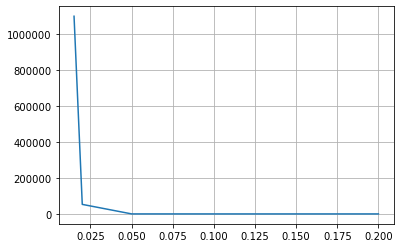

In [57]:
#simple plot of the number of itemsets generated according to minimum support
plt.plot(df_performance["threshold"], df_performance["num_itemsets"])
plt.grid()
plt.show()

Segundo o gráfico de cima é possivel verificar que o número de itemsets (conjuntos de genes) vai aumentando à medida que o valor do threshold vai diminuindo.

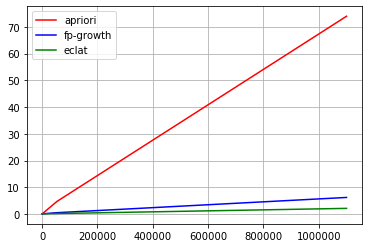

In [25]:
#simple graph
plt.plot(df_performance["num_itemsets"], df_performance["Apriori Time"], c="r", label="apriori")
plt.plot(df_performance["num_itemsets"], df_performance["FP-growth Time"], c="b", label="fp-growth")
plt.plot(df_performance["num_itemsets"], df_performance["ECLAT Time"], c="g", label="eclat")
plt.grid()
plt.legend()
plt.show()

Este gráfico mostra-nos que o algoritmo ECLAT é aquele que apresenta o melhor desempenho para qualquer que seja o número de itemsets (conjuntos de genes) existentes.

Outra representação gráfica dos desempenhos dos algoritmos utilizados em função do número de itemsets (conjuntos de genes), mas desta vez logarítmica:

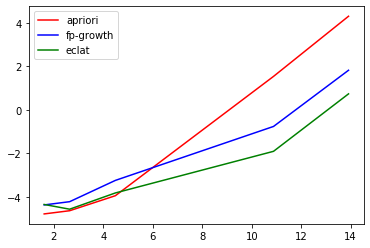

In [26]:
#log graph
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["Apriori Time"]), c="r", label="apriori")
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["FP-growth Time"]), c="b", label="fp-growth")
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["ECLAT Time"]), c="g", label="eclat")
plt.legend()
plt.show()

Baseado nos resultados de performance de cada algoritmo, foi feita a identificação de conjuntos de genes frequentes utilizando o algoritmo ECLAT:

In [27]:
t0 = time.time()
FI_eclat = pyeclat(acts_ds, 0.02)
t1 = time.time()
t_eclat = t1-t0
print("O tempo que demorou a fazer a pesquisa utilizando ECLAT:", t_eclat, "segundos\n")
FI_eclat

O tempo que demorou a fazer a pesquisa utilizando ECLAT: 0.18382048606872559 segundos



,support,itemsets
0,0.020890,"(CA12,)"
1,0.020890,"(SLC22A6,)"
2,0.021798,"(EGFR,)"
3,0.020890,"(HTR7, DRD2)"
4,0.022707,"(HTR7,)"
...,...,...
53058,0.297911,"(SLCO1B3, SLCO1B1)"
53059,0.305177,"(SLCO1B3,)"
53060,0.156222,"(SLCO1B1, REP)"
53061,0.306085,"(SLCO1B1,)"


Depois da identificação dos conjuntos de genes frequentes para um threshold de 0.02 foi feita a identificação de regras de associação para os conjuntos de genes frequentes,utilizando o algoritmo ECLAT (melhores resultados de desempenho) para um threshold de 70% na confiança e ordenados pelo lift: 

In [28]:
rules_eclat = association_rules(FI_eclat, metric="confidence", min_threshold=0.70)

Seleção das regras de associação com um lift superior ou igual a 44 e uma convicção superior a 13:

In [29]:
rules_eclat[(rules_eclat["lift"]>=44) & (rules_eclat["conviction"]>13)].sort_values(by=['lift'],ascending=[False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
452270,"(ADRA2B, SLC6A2, CHRM4, HTR2B, HTR2A, DRD1, CHRM2, CHRM1)","(ADRA2A, DRD3, CHRM3, HTR6)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
809921,"(SLC6A2, CHRM4, HTR2B, ADRA1D, HTR2A, CHRM2)","(ADRA2A, ADRA2B, HTR6, DRD3, CHRM3, CHRM1)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
820465,"(SLC6A2, CHRM4, HTR2B, ADRA1D, HTR2A, CHRM2, CHRM1)","(ADRA2A, DRD3, CHRM3, HTR6)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
820830,"(SLC6A2, CHRM4, HTR2B, ADRA1D, HTR2A, CHRM2)","(ADRA2A, HTR6, DRD3, CHRM3, CHRM1)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
820841,"(SLC6A2, CHRM4, HTR2B, ADRA1D, CHRM2, CHRM1)","(ADRA2A, HTR6, HTR2A, DRD3, CHRM3)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
...,...,...,...,...,...,...,...,...,...
494183,"(DRD1, ADRA2B, CHRM2, SLC6A2)","(ADRA2A, CHRM4, HTR6, HTR2A, DRD3, CHRM3, CHRM1)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
495670,"(ADRA2B, SLC6A2, CHRM4, HTR2A, DRD1, CHRM2)","(ADRA2A, DRD3, CHRM3, HTR6)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
495874,"(ADRA2B, SLC6A2, CHRM4, DRD1, CHRM2)","(ADRA2A, HTR6, HTR2A, DRD3, CHRM3)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf
495890,"(ADRA2B, SLC6A2, HTR2A, DRD1, CHRM2)","(ADRA2A, CHRM4, HTR6, DRD3, CHRM3)",0.02089,0.022707,0.02089,1.0,44.04,0.020416,inf


Com estes resultados obtidos, podemo dizer por exemplo que:

- Se uma molécula tiver os genes SLC6A2, CHRM4, HTR2B, ADRA1D, HTR2A, CHRM2 também terá os genes ADRA2A, ADRA2B, HTR6, DRD3, CHRM3, CHRM1;
- Se uma molécula tiver os genes SLC6A2, CHRM4, HTR2B, ADRA1D, CHRM2, CHRM1 também terá os genes ADRA2A, HTR6, HTR2A, DRD3, CHRM3.
- ...

### Supervised Learning

O próximo objetivo realizado trata-se de um problema de aprendizagem supervisionada, onde foi selecionado um gene como classe ("SLCO1B1") e que terá como objetivo, identificar se determinada molécula contém ou não este gene ("SLCO1B1").

O conjunto de dados será dividido em conjunto de treino e validação independente. Posteriormente serão treinados vários modelos. Destes será selecionado, apenas aquele que obteve melhores resultados de f1-score (métrica utilizada por se tratar de um problema binário) com a ajuda da validação cruzada, de seguida o melhor modelo será treinado com todo o conjunto de treino e avaliado pelo conjunto de validação independente.



seleção da target SLCO1B1 como a classe:

In [30]:
col = acts_binary_ds["SLCO1B1"]

Deslocação da coluna da target selecionada para a última posição do dataframe:

In [31]:
acts_binary_ds = acts_binary_ds.drop("SLCO1B1", axis="columns")

In [32]:
acts_binary_ds["SLCO1B1"] = col

In [33]:
acts_binary_ds.columns

Index(['1272966', '5HTR1D', 'AADAC', 'AAK1', 'ABAT', 'ABCB1', 'ABCB11',
       'ABCB1A', 'ABCB1B', 'ABCC1',
       ...
       'VIM-2', 'VKORC1', 'VRK2', 'WEE1', 'WEE2', 'XBP1', 'XDH', 'YES1',
       'ZAP70', 'SLCO1B1'],
      dtype='object', length=1244)

Conversão dos valores do conjunto de dados para valores binários (valores atuais do conjunto de dados: True e False):

In [34]:
acts_binary_ds = acts_binary_ds.astype(int)

Número de moléculas que têm e não têm o gene selecionado (SLCO1B1):

In [35]:
acts_binary_ds['SLCO1B1'].value_counts()

0    764
1    337
Name: SLCO1B1, dtype: int64

Representação gráfica do número de moléculas ativas no gene SLCO1B1:

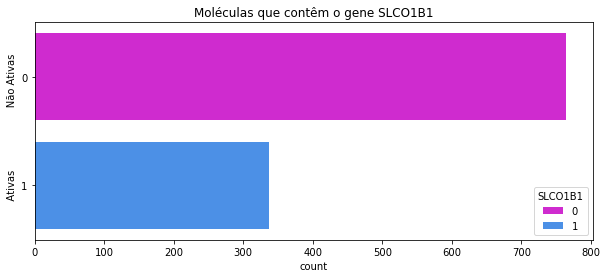

In [36]:
plt.figure(1, figsize=(10, 4))
plt.title("Moléculas que contêm o gene SLCO1B1")
sns.countplot(y="SLCO1B1", data=acts_binary_ds, palette=['#EA10EA',"#338DFF"], hue="SLCO1B1", dodge=False)  
plt.legend(title='SLCO1B1')
plt.ylabel("   Ativas                    Não Ativas")
plt.show()

Como se pode ver existe um maior número de moléculas que não têm o gene SLCO1B1.

Conversão do dataframe para NumPy array:

In [37]:
acts_array = np.array(acts_binary_ds)
dataFeatures = np.array(acts_binary_ds.columns)

X = acts_array[:, :-1]
y = acts_array[:, -1]

target = dataFeatures[-1]
features = dataFeatures[:-1]

X = X.astype(int)
y = y.astype(int)
print("features names:\n", features, "\n")
print("Number of features:\n", len(features), "\n")
print("target name:", target, "\n")
print("X Shape: ", X.shape)
print("Y shape: ", y.shape)

features names:
 ['1272966' '5HTR1D' 'AADAC' ... 'XDH' 'YES1' 'ZAP70'] 

Number of features:
 1243 

target name: SLCO1B1 

X Shape:  (1101, 1243)
Y shape:  (1101,)


De maneira a selecionar o melhor modelo, foi criada uma função que utiliza o conjunto de treino para a validação cruzada de n ficheiros, retornando um conjunto de testes e os valores previstos pelo conjunto de teste. 

In [38]:
def modelSelection(X_TRAIN, y_TRAIN, model):
    kf = KFold(n_splits=5, shuffle=True)

    TRUTH=None
    PREDS=None

    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        
        mdl = model
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))

    return TRUTH, PREDS, X_test, y_test

Divisão do conjunto de dados em:

- Conjunto de treino;
- Conjunto de validação independente. 

In [39]:
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X, y, test_size=0.25, random_state=123)

De seguida são selecionados 7 modelos de classificação, que serão treinados na função modelSelection. Destes apenas aquele que obteve o melhor f1 score será selecionado para ser treinado com todo o conjunto de treino. 

In [40]:
models=[BernoulliNB(alpha=0.01), 
        BernoulliNB(alpha=1), 
        RandomForestClassifier(n_estimators= 1000, random_state=0), 
        DecisionTreeClassifier(criterion="entropy", random_state=0), 
        DecisionTreeClassifier(random_state=0), svm.SVC(random_state=0), 
        AdaBoostClassifier(n_estimators=1000, random_state=0)]

f1 = 0

D={"models":[   "BernoulliNB(alpha=0.01)", 
                "BernoulliNB(alpha=1)", 
                "RandomForestClassifier(n_estimators= 1000, random_state=0)", 
                "DecisionTreeClassifier(criterion=\"entropy\", random_state=0)", 
                "DecisionTreeClassifier(random_state=0), svm.SVC(random_state=0)",
                "svm.SVC(random_state=0)",
                "AdaBoostClassifier(n_estimators=1000, random_state=0)"
            ], 
   "Matthews correlation coefficient":[],
   "Precision":[], 
   "Recall":[], 
   "F1-score":[]}

for i in models:
    t, p, XTest, yTest = modelSelection(X_TRAIN, y_TRAIN, i)
    
    f1Score = f1_score(t, p)
    recallScore = recall_score(t, p)
    precisionScore = precision_score(t, p)
    mc = matthews_corrcoef(t, p)

    D["Matthews correlation coefficient"].append(mc)
    D["Precision"].append(precisionScore)
    D["Recall"].append(recallScore)
    D["F1-score"].append(f1Score)

    if(f1Score > f1):
        bestModel = i
        f1 = f1Score
        TRUTH = t
        PREDS = p
        X_test = XTest
        y_test = yTest

trainedModels = pd.DataFrame(D)
print("Best Model: {}\n".format(bestModel))
trainedModels

Best Model: RandomForestClassifier(n_estimators=1000, random_state=0)



,models,Matthews correlation coefficient,Precision,Recall,F1-score
0,BernoulliNB(alpha=0.01),0.752061,0.759322,0.910569,0.828096
1,BernoulliNB(alpha=1),0.724860,0.822034,0.788618,0.804979
2,"RandomForestClassifier(n_estimators= 1000, random_state=0)",0.950713,0.967347,0.963415,0.965377
3,"DecisionTreeClassifier(criterion=""entropy"", random_state=0)",0.933006,0.970464,0.934959,0.952381
4,"DecisionTreeClassifier(random_state=0), svm.SVC(random_state=0)",0.941789,0.974790,0.943089,0.958678
5,svm.SVC(random_state=0),0.903783,0.973333,0.890244,0.929936
6,"AdaBoostClassifier(n_estimators=1000, random_state=0)",0.921353,0.958159,0.930894,0.944330


Por tratar-se de um problema binário, foi analisada a precisão, o recall, o f1 score e o coeficiente de correlação Matthews, de maneira a avaliar a qualidade do modelo final selecionado.

In [41]:
print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

These are the training set statistics:
The Precision is:  0.9673
The Recall is:  0.9634
The F1 score is:  0.9654
The Matthews correlation coefficient is:  0.9507


Para finalizar foi efetuado o treino do modelo para todo conjunto de treino, sendo este avaliado pelo conjunto de validação independente.

In [42]:
mdl = bestModel
mdl.fit(X_TRAIN, y_TRAIN)


ivs_preds = mdl.predict(X_IVS)

ivs_preds

print("These are the independent validation set statistics:")
print("The Precision is: %7.4f" % precision_score(y_IVS, ivs_preds))
print("The Recall is: %7.4f" % recall_score(y_IVS, ivs_preds))
print("The F1 score is: %7.4f" % f1_score(y_IVS, ivs_preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_IVS, ivs_preds)) 

These are the independent validation set statistics:
The Precision is:  0.9574
The Recall is:  0.9890
The F1 score is:  0.9730
The Matthews correlation coefficient is:  0.9596


Para além dos bons resultados obtidos pelo modelo, é possível verificar que não existe sinal de overfitting, pois os scores continuam semelhantes para novos dados em relação aos obtidos com o conjunto de teste na fase de treino do modelo.

### Similar Molecules

Depois de efetuadas duas tarefas relativas ao conjunto de dados do ficheiro acts.txt, resolveu-se utilizar o conjunto de dados do ficheiro fps.txt para a descoberta de moléculas que sejam possívelmente semelhantes. Foi selecionado este conjunto de dados também porque este já se encontra no formato binário procurando desta forma encontrar moléculas semelhantes verificando se as posições dos 1s se encontram nas mesmas colunas que os 1s de outras moléculas.  

Definição da função JaccardSim para cálculo das semelhanças entre moléculas:

In [43]:
def JaccardSim(d1, d2):
    a =np.sum(d1*d2)
    bc=np.sum(d1+d2>0)
    return a/bc

Definição das moléculas como índice do dataframe:

In [45]:
fps_ds = fps_ds.set_index(0)

Número de linhas e colunas do cojunto de dados pertencente ao ficheiro fps.txt:

In [46]:
M = fps_ds.shape[1]
N = fps_ds.shape[0]

print(N)
print(M)

1101
2048


Listagem das moléculas existente no conjunto de dados:

In [47]:
molecule = fps_ds.index.to_list()

Conversão do dataframe para NumPy array:

In [48]:
fps_array = fps_ds.to_numpy()

Cálculo das semelhanças entre as moléculas utilizando a função JaccardSim definida em cima, e seleção das semelhenças com um valor de Jaccard superior a 70%:

In [51]:
D = {   "Molecules": [],
        "Jaccard Similar": []
}

for d1 in range(N-1):
    for d2 in range(d1+1, N):
        J = JaccardSim(fps_array[d1], fps_array[d2])
        if J>0.7 and d1!=d2:
            D["Molecules"].append("{} is similar to {}".format(molecule[d1],molecule[d2]))
            D["Jaccard Similar"].append(J)

fps_similar = pd.DataFrame(D)
                             

Configuração da tabela de forma a mostrar todas as semelhanças encontradas:

In [52]:
pd.set_option('display.max_rows', None)

Número de semelhanças encontradas com jaccard superior a 70%:

In [53]:
len(fps_similar)

70

Representação do dataframe com as 70 semelhanças encontradas:

In [54]:
fps_similar.sort_values(by=["Jaccard Similar"], ascending=[False])

,Molecules,Jaccard Similar
64,PDFDA0866 is similar to PDFDA0867,1.000000
10,PDFDA0077 is similar to PDFDA0438,1.000000
33,PDFDA0284 is similar to PDFDA0643,1.000000
34,PDFDA0287 is similar to PDFDA0557,1.000000
16,PDFDA0140 is similar to PDFDA0548,1.000000
1,PDFDA0017 is similar to PDFDA1074,1.000000
13,PDFDA0115 is similar to PDFDA0281,1.000000
12,PDFDA0090 is similar to PDFDA0487,1.000000
22,PDFDA0188 is similar to PDFDA1062,1.000000
37,PDFDA0330 is similar to PDFDA0362,1.000000
